In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
ds = xr.open_dataset("/pscratch/sd/z/zespinos/crps_deterministic_inference/crps_ocean_24H_ze_otd2_062.006.000/forecast_ocean_ll.zarr")
target = xr.open_dataset("/pscratch/sd/z/zespinos/datasets/ll_1deg_1994-2023_daily_23var_Coupled-3var_24H_ttr.zarr")
ds = ds.rename({"lat": "latitude", "lon": "longitude"})
target = target.rename({"lat": "latitude", "lon": "longitude"})
target

/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset> Size: 140GB
Dimensions:      (channel_c: 1, channel_in: 26, channel_out: 23, latitude: 181,
                  longitude: 360, time: 10957)
Coordinates:
  * channel_c    (channel_c) <U3 12B 'lsm'
  * channel_in   (channel_in) <U9 936B 'sst' 'sic' ... 'z1000-24H' 'ttr-24H'
  * channel_out  (channel_out) <U6 552B 'sst' 'sic' 'sit' ... 't200m' 't300m'
  * latitude     (latitude) float32 724B 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
  * longitude    (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time         (time) datetime64[ns] 88kB 1994-01-01 1994-01-02 ... 2023-12-31
Data variables:
    constants    (channel_c, latitude, longitude) float32 261kB ...
    inputs       (time, channel_in, latitude, longitude) float32 74GB ...
    targets      (time, channel_out, latitude, longitude) float32 66GB ...

In [28]:
import sys
sys.path.append("/pscratch/sd/z/zespinos/")
from dataloaders.dlesym_dataloader import load_land_sea_mask
masking_cfg = {
    "enabled": True,   # Enable land-sea mask for ocean evaluation
    "type": "land",    # Mask out land points (keep ocean only)
    "path": "/pscratch/sd/z/zespinos/Data/ERA5/daily/era5_1950-2023_daily_1deg_lsm.nc",
    "variable": "lsm", # lsm or land_sea_mask
    "threshold": 0.50  # Values >= 0.5 are considered land (and will be masked)
}
lsm = load_land_sea_mask(masking_cfg)
lsm

<xarray.DataArray 'lsm' (latitude: 181, longitude: 360)> Size: 65kB
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude   (latitude) float32 724B 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
    time       datetime64[ns] 8B 2000-01-01

<xarray.DataArray 'lsm' (latitude: 181, longitude: 360)> Size: 521kB
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude   (latitude) float32 724B 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
    time       datetime64[ns] 8B ...

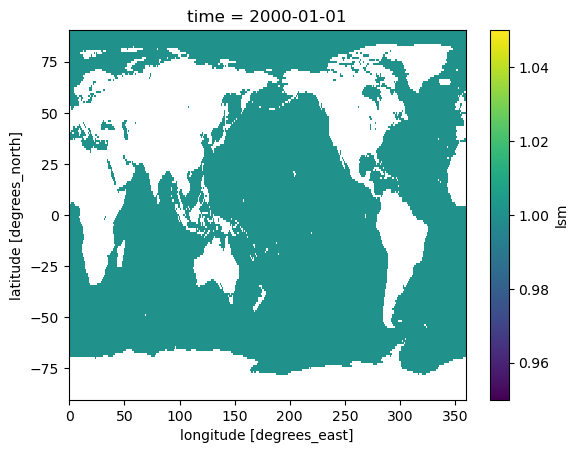

In [29]:
lsm = xr.open_dataset("/pscratch/sd/z/zespinos/Data/ERA5/daily/era5_1950-2023_daily_1deg_lsm.nc")
lsm_is_ocean = xr.where(lsm.lsm < 0.05, 1.0, np.nan)
lsm_is_ocean.plot()
lsm_is_ocean

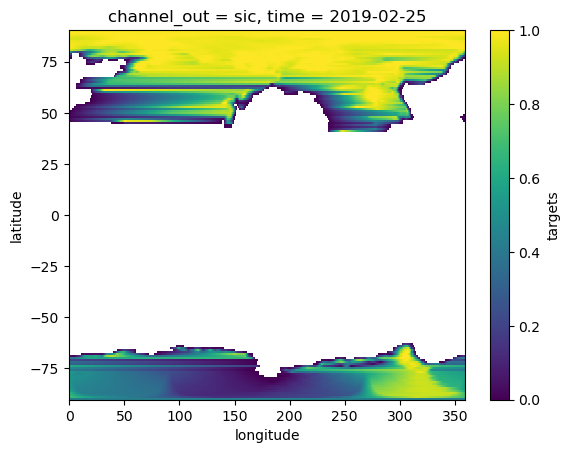

In [83]:
target["targets"].isel(channel_out=1).sel(time="2019-02-25").plot()

is nan in sic: <xarray.DataArray 'sic' ()> Size: 1B
array(False)
Coordinates:
    ensemble   int64 8B 3
    init_time  datetime64[ns] 8B 2019-01-01
    lead_time  timedelta64[ns] 8B 00:00:00
number of nans in sic: <xarray.DataArray 'sic' ()> Size: 8B
array(0)
Coordinates:
    ensemble   int64 8B 3
    init_time  datetime64[ns] 8B 2019-01-01
    lead_time  timedelta64[ns] 8B 00:00:00


<xarray.DataArray 'sic' (latitude: 181, longitude: 360)> Size: 65kB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    ensemble   int64 8B 3
    init_time  datetime64[ns] 8B 2019-01-01
  * latitude   (latitude) float32 724B 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
    lead_time  timedelta64[ns] 8B 00:00:00
  * longitude  (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0

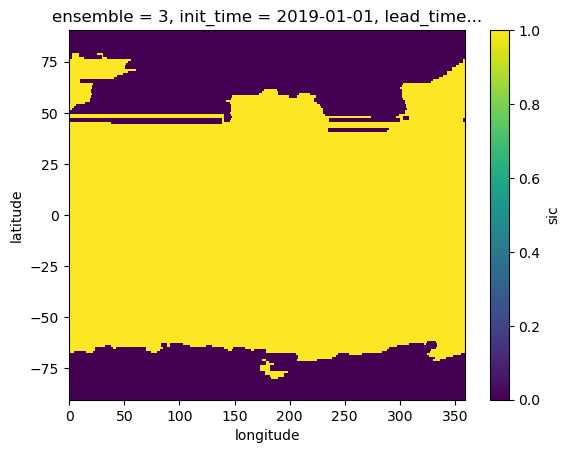

In [85]:
# sic = ds["sic"]
sic = ds["sic"].isel(ensemble=-1, lead_time=0, init_time=0) #.plot()
sic = sic.isnull()
sic.plot()
# valid_time = ds.init_time.isel(init_time=5) + ds.lead_time.isel(lead_time=20)
# valid_time
# Check for nans in sic
print(f"is nan in sic: {np.isnan(sic).any()}")
# count nans 
print(f"number of nans in sic: {np.isnan(sic).sum()}")
# print valid_time timeframe with nans
np.isnan(sic)

<xarray.DataArray ()> Size: 8B
array(0.63202083)
Coordinates:
    channel_out  <U6 24B 'sst'
    init_time    datetime64[ns] 8B 2019-01-15
    lead_time    timedelta64[ns] 8B 10 days
    ensemble     int64 8B 0

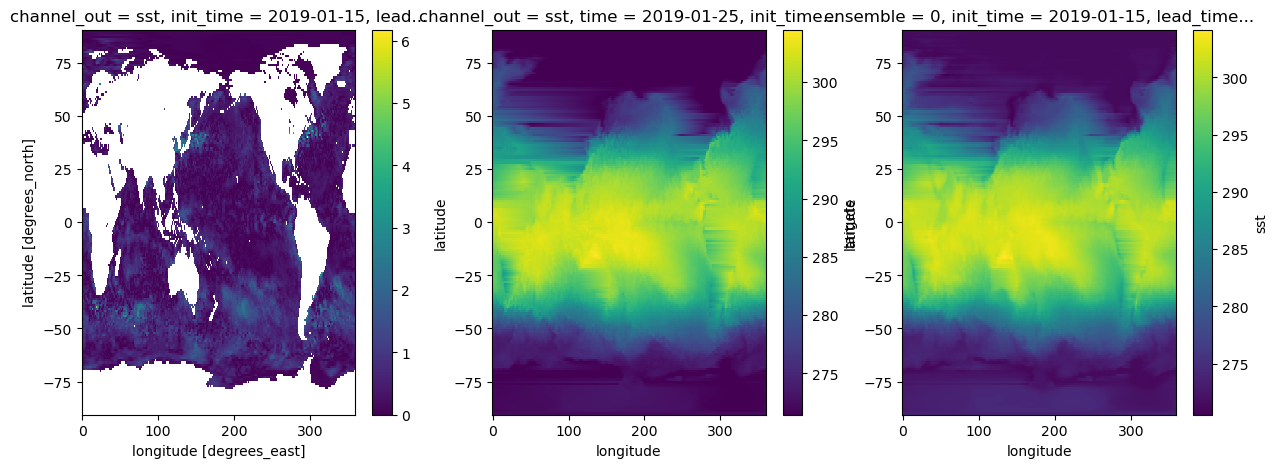

In [38]:
init_time = 2
lead_time = 10
valid_time = ds.init_time.isel(init_time=init_time) + ds.lead_time.isel(lead_time=lead_time)
t = target["targets"].isel(channel_out=0).sel(time=valid_time)
# t = t.fillna(0)
rmse = lsm_is_ocean*(t- ds["sst"].isel(ensemble=0, lead_time=lead_time, init_time=init_time))**2
#
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
(rmse**0.5).plot(ax=axes[0])
t.plot(ax=axes[1])
ds["sst"].isel(ensemble=0, lead_time=lead_time, init_time=init_time).plot(ax=axes[2])
rmse.mean()**(0.5)


In [ ]:
import numpy as np
ensemble_member = 0
channel_out = 0 # sic
rmse_lead_time = np.zeros(len(ds.lead_time))
for i in range(len(ds.init_time)):
    print("Starting init_time: ", i)
    for j in range(len(ds.lead_time)):
        valid_time = ds.init_time.isel(init_time=i) + ds.lead_time.isel(lead_time=j)
        rmse = lsm_is_ocean*(target["targets"].isel(channel_out=0).sel(time=valid_time) - ds["sic"].isel(ensemble=ensemble_member, lead_time=j, init_time=i))**2
        rmse_lead_time[j] += rmse.mean()

rmse_lead_time = rmse_lead_time / len(ds.init_time)
rmse_lead_time

Starting init_time:  0


Starting init_time:  1
Starting init_time:  2
Starting init_time:  3
Starting init_time:  4
Starting init_time:  5
Starting init_time:  6
Starting init_time:  7
Starting init_time:  8
Starting init_time:  9


array([0.        , 0.00026021, 0.00066911, 0.00107777, 0.0014501 ,
       0.00187045, 0.00236185, 0.00272856, 0.00312233, 0.00369467,
       0.00413132, 0.00449893, 0.00495147, 0.00535713, 0.00571441,
       0.00620548, 0.006676  , 0.00704757, 0.00754627, 0.00779071,
       0.00816118, 0.00854134, 0.00891806, 0.00945658, 0.00999236,
       0.01054063, 0.0110397 , 0.01142706, 0.01169607, 0.01224434,
       0.01291838, 0.01380899, 0.01453185, 0.01510679, 0.01582939,
       0.01622835, 0.0168228 , 0.0174459 , 0.01794289, 0.01830945,
       0.01875411, 0.01977287, 0.0204677 , 0.02092041, 0.02154498,
       0.02213411, 0.02274929, 0.02366716, 0.0245907 , 0.02518865,
       0.02573114, 0.02646762, 0.02717749, 0.02787914, 0.02847707,
       0.02925179, 0.03000003, 0.03072041, 0.03117713, 0.03196593,
       0.03267879, 0.03324863, 0.03436415, 0.03565092, 0.03658345,
       0.0375117 , 0.03856053, 0.03962771, 0.04018291, 0.04139286,
       0.04257118, 0.04378325, 0.04486073, 0.04557274, 0.04632

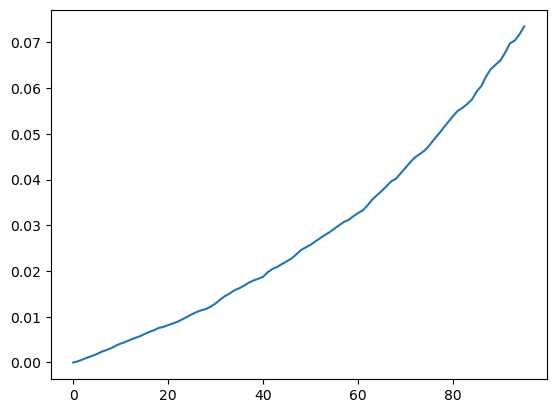

In [26]:
plt.plot(rmse_lead_time)

In [25]:
ds_inf = xr.open_dataset("/pscratch/sd/z/zespinos/crps_deterministic_inference/coupled_crps-spectral-atmos_crps-ocean_ft_006.010.000/forecast_ocean.zarr")
ds_ll = xr.open_dataset("/pscratch/sd/z/zespinos/crps_deterministic_inference/coupled_crps-spectral-atmos_crps-ocean_ft_006.010.000/forecast_ocean_ll.zarr")
# count nans 
print(ds_ll["sic"].isel(ensemble=0, lead_time=1, init_time=0).isnull().sum())
# count nans 
print(ds_inf["sic"].isel(ensemble=0, time=0, step=1).isnull().sum())

/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.DataArray 'sic' ()> Size: 8B
array(0)
Coordinates:
    ensemble   int64 8B 0
    init_time  datetime64[ns] 8B 2019-01-01
    lead_time  timedelta64[ns] 8B 4 days
<xarray.DataArray 'sic' ()> Size: 8B
array(0)
Coordinates:
    ensemble  int64 8B 0
    step      timedelta64[ns] 8B 4 days
    time      datetime64[ns] 8B 2019-01-01


/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


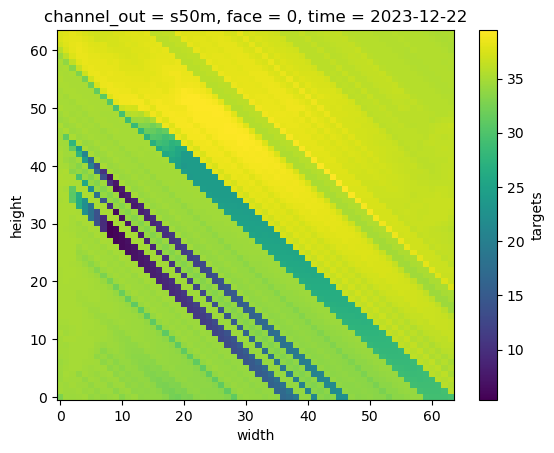

In [19]:
ds_hpx = xr.open_dataset("/pscratch/sd/z/zespinos/datasets/hpx64_1994-2023_daily_23var_Coupled-3var_24H_ttr.zarr")
ds_hpx.isel(time=-10)["targets"].isel(channel_out=6, face=0).plot() #.isnull().sum()

/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/api.py:588: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an erro

<xarray.DataArray 'targets' ()> Size: 8B
array(0)
Coordinates:
    channel_out  <U6 24B 'sic'
<xarray.DataArray 'targets' ()> Size: 8B
array(0)
Coordinates:
    channel_out  <U6 24B 'sic'


<xarray.Dataset> Size: 115MB
Dimensions:      (channel_c: 1, channel_in: 26, channel_out: 23, lat: 181,
                  lon: 360, time: 9)
Coordinates:
  * channel_c    (channel_c) <U3 12B 'lsm'
  * channel_in   (channel_in) <U9 936B 'sst' 'sic' ... 'z1000-24H' 'ttr-24H'
  * channel_out  (channel_out) <U6 552B 'sst' 'sic' 'sit' ... 't200m' 't300m'
  * lat          (lat) float32 724B 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * lon          (lon) float32 1kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 72B 2023-12-22 2023-12-23 ... 2023-12-30
Data variables:
    constants    (channel_c, lat, lon) float32 261kB ...
    inputs       (time, channel_in, lat, lon) float32 61MB ...
    targets      (time, channel_out, lat, lon) float32 54MB ...

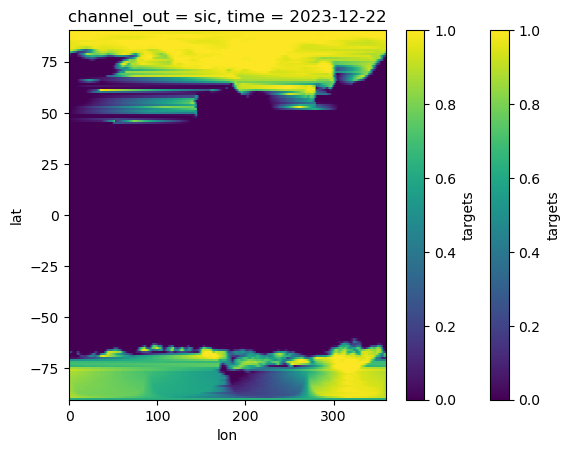

In [12]:
ds_ll = xr.open_dataset("/pscratch/sd/z/zespinos/Data/data_processing/debug_nans.zarr", decode_cf=False)
# check for nans in sic
print(ds_ll["targets"].isel(channel_out=1).isnull().sum())
# ds_ll["targets"].isel(channel_out=1).isnull().sum()
ds_ll["targets"].isel(channel_out=1).isel(time=0).plot()
ds_ll

for v in ds_ll.data_vars:
    ds_ll[v].attrs.pop("_FillValue", None)
    ds_ll[v].attrs.pop("missing_value", None)

print(ds_ll["targets"].isel(channel_out=1).isnull().sum())
# ds_ll["targets"].isel(channel_out=1).isnull().sum()
ds_ll["targets"].isel(channel_out=1).isel(time=0).plot()
ds_ll

/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


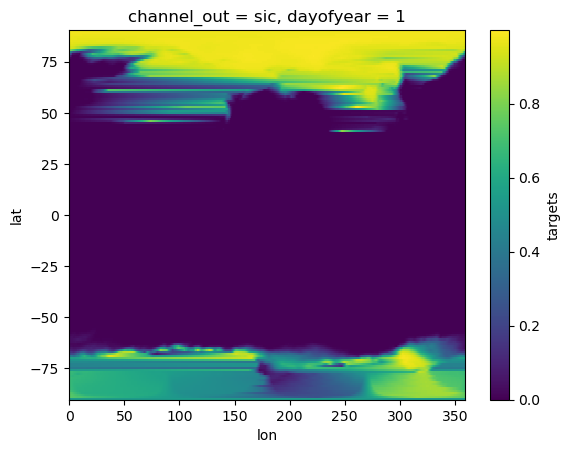

In [ ]:
ds_ll = xr.open_dataset("/pscratch/sd/z/zespinos/datasets/climatologies/ll_1deg_1994-2023_daily_23var_Coupled-3var_96H_ttr_clim_2000_2020.zarr", decode_cf=False)
ds_ll["targets"].isel(channel_out=0).isel(dayofyear=0).plot()

/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/api.py:588: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an erro

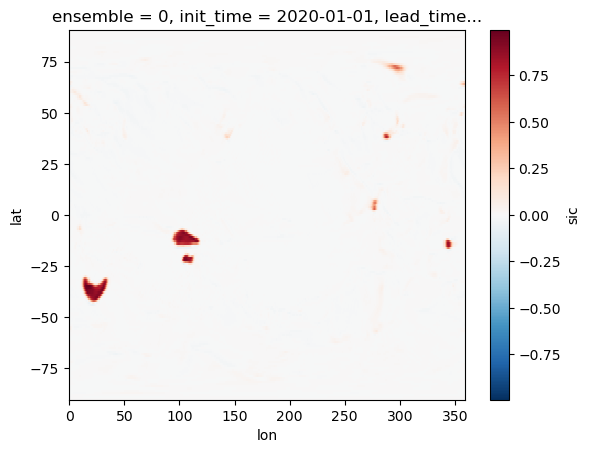

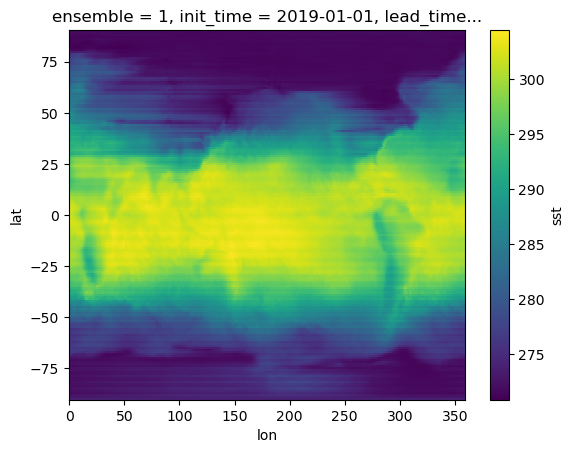

In [13]:
ds = xr.open_dataset("/pscratch/sd/z/zespinos/crps_deterministic_inference/crps_ocean_24H_ze_noise_mod_079.006.000/forecast_ocean_ll.zarr")
ds["sst"].isel(ensemble=1, lead_time=50, init_time=0).plot()

In [8]:
ds_eval = xr.open_dataset("/pscratch/sd/z/zespinos/crps_deterministic_evals/eval_079.006.000/evals_ocean_079.006.000_timeseries_timeseries.nc")
ds_eval["crps_skill.t50m"].isel(init_time=0).values

array([[290.75995, 298.23022, 274.51474, 272.7738 ],
       [290.7601 , 298.22632, 274.50238, 272.7905 ],
       [290.76324, 298.22803, 274.48776, 272.81085],
       [290.76584, 298.2299 , 274.47144, 272.8294 ],
       [290.76767, 298.22977, 274.45456, 272.84793],
       [290.772  , 298.23276, 274.43567, 272.86862],
       [290.77606, 298.23264, 274.4169 , 272.88776],
       [290.78085, 298.23477, 274.40158, 272.90192],
       [290.7849 , 298.23642, 274.38962, 272.91437],
       [290.78836, 298.2361 , 274.37668, 272.9277 ],
       [290.79114, 298.2364 , 274.3608 , 272.9426 ],
       [290.7939 , 298.23615, 274.34604, 272.9583 ],
       [290.79517, 298.2307 , 274.3365 , 272.9786 ],
       [290.79733, 298.22565, 274.32724, 273.00906],
       [290.79868, 298.2234 , 274.31784, 273.0329 ],
       [290.7997 , 298.21976, 274.30618, 273.0518 ],
       [290.8017 , 298.21936, 274.29343, 273.06625],
       [290.8078 , 298.22507, 274.2827 , 273.0817 ],
       [290.8105 , 298.22412, 274.2705 , 273.0

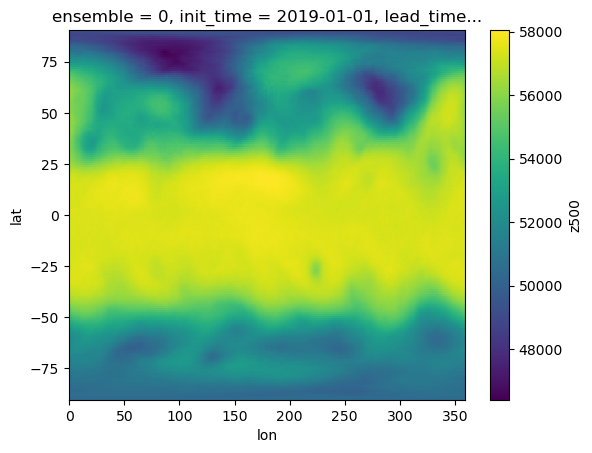

In [15]:
ds_atmos = xr.open_dataset("/pscratch/sd/z/zespinos/crps_deterministic_inference/crps_ocean_24H_ze_noise_mod_dialations_1_086.002.000/forecast_atmos_ll.zarr")
ds_atmos["z500"].isel(ensemble=0, lead_time=8, init_time=0).plot()

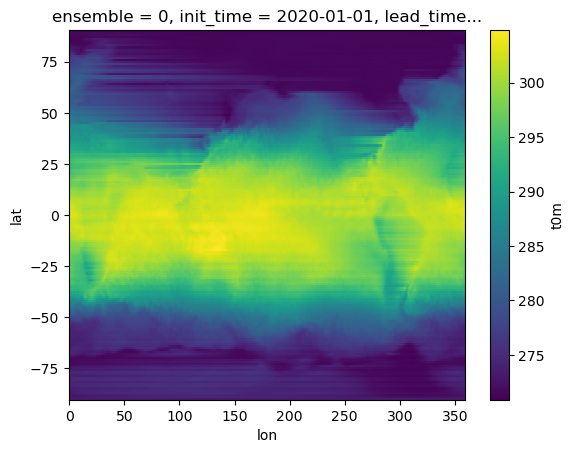

In [5]:
import xarray as xr
ds = xr.open_dataset("/pscratch/sd/z/zespinos/crps_deterministic_inference/crps_ocean_24H_ze_noise_mod_dialations_1_086.001.000/forecast_ocean_ll.zarr", decode_cf=False)
ds_last_time = ds["t0m"].isel(ensemble=0, init_time=0) #, lead_time=slice(-100, None))
# ds_last_time.mean(["lat", "lon"]).plot()
ds_last_time.isel(lead_time=23).plot()
# ds_last_time.isel(lead_time=slice(23, 24)).mean(["lead_time", "lat"]).plot()

/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/global/homes/z/zespinos/.conda/envs/nsidc_process/lib/python3.9/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


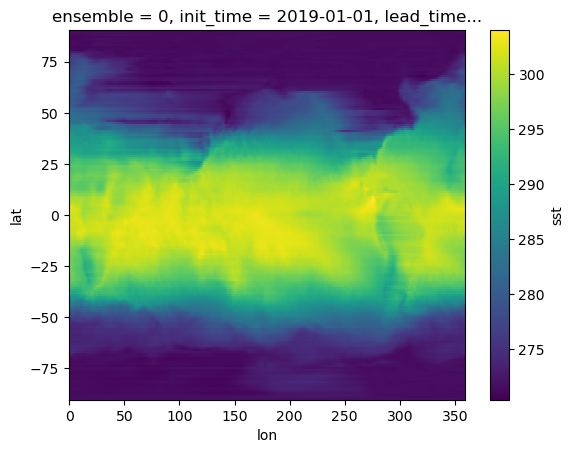

In [12]:
ds = xr.open_dataset("/pscratch/sd/z/zespinos/crps_deterministic_inference/crps_ocean_24H_ze_noise_mod_dialations_1_086.002.000/forecast_ocean_driven_ll.zarr", decode_cf=False)
ds_last_time = ds["sst"].isel(ensemble=0, init_time=0) #, lead_time=slice(-100, None))
ds_last_time.isel(lead_time=50).plot()